<a href="https://colab.research.google.com/github/odu-cs625-datavis/public-fall24-mcw/blob/main/Distributions_in_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Distributions Examples in Python (Seaborn)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import matplotlib as mpl
from seaborn import axes_style

Load the diamonds dataset

In [2]:
url = "https://github.com/byuidatascience/data4python4ds/raw/master/data-raw/diamonds/diamonds.csv"
diamonds = pd.read_csv(url)

Set the ordering of the ordered attributes (originally categorical)

In [3]:
diamonds['cut'] = pd.Categorical(diamonds.cut,
  ordered = True,
  categories =  ["Fair", "Good", "Very Good", "Premium", "Ideal" ])

diamonds['color'] = pd.Categorical(diamonds.color,
  ordered = True,
  categories =  ["D", "E", "F", "G", "H", "I", "J"])

diamonds['clarity'] = pd.Categorical(diamonds.clarity,
  ordered = True,
  categories =  ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"])

In [4]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Histogram
For the histogram, we show the distribution of diamond prices.

To create the histogram, we use the `so.Hist()` function. `binwidth` sets the size of each histogram bin (this one is set to 500, representing $500).

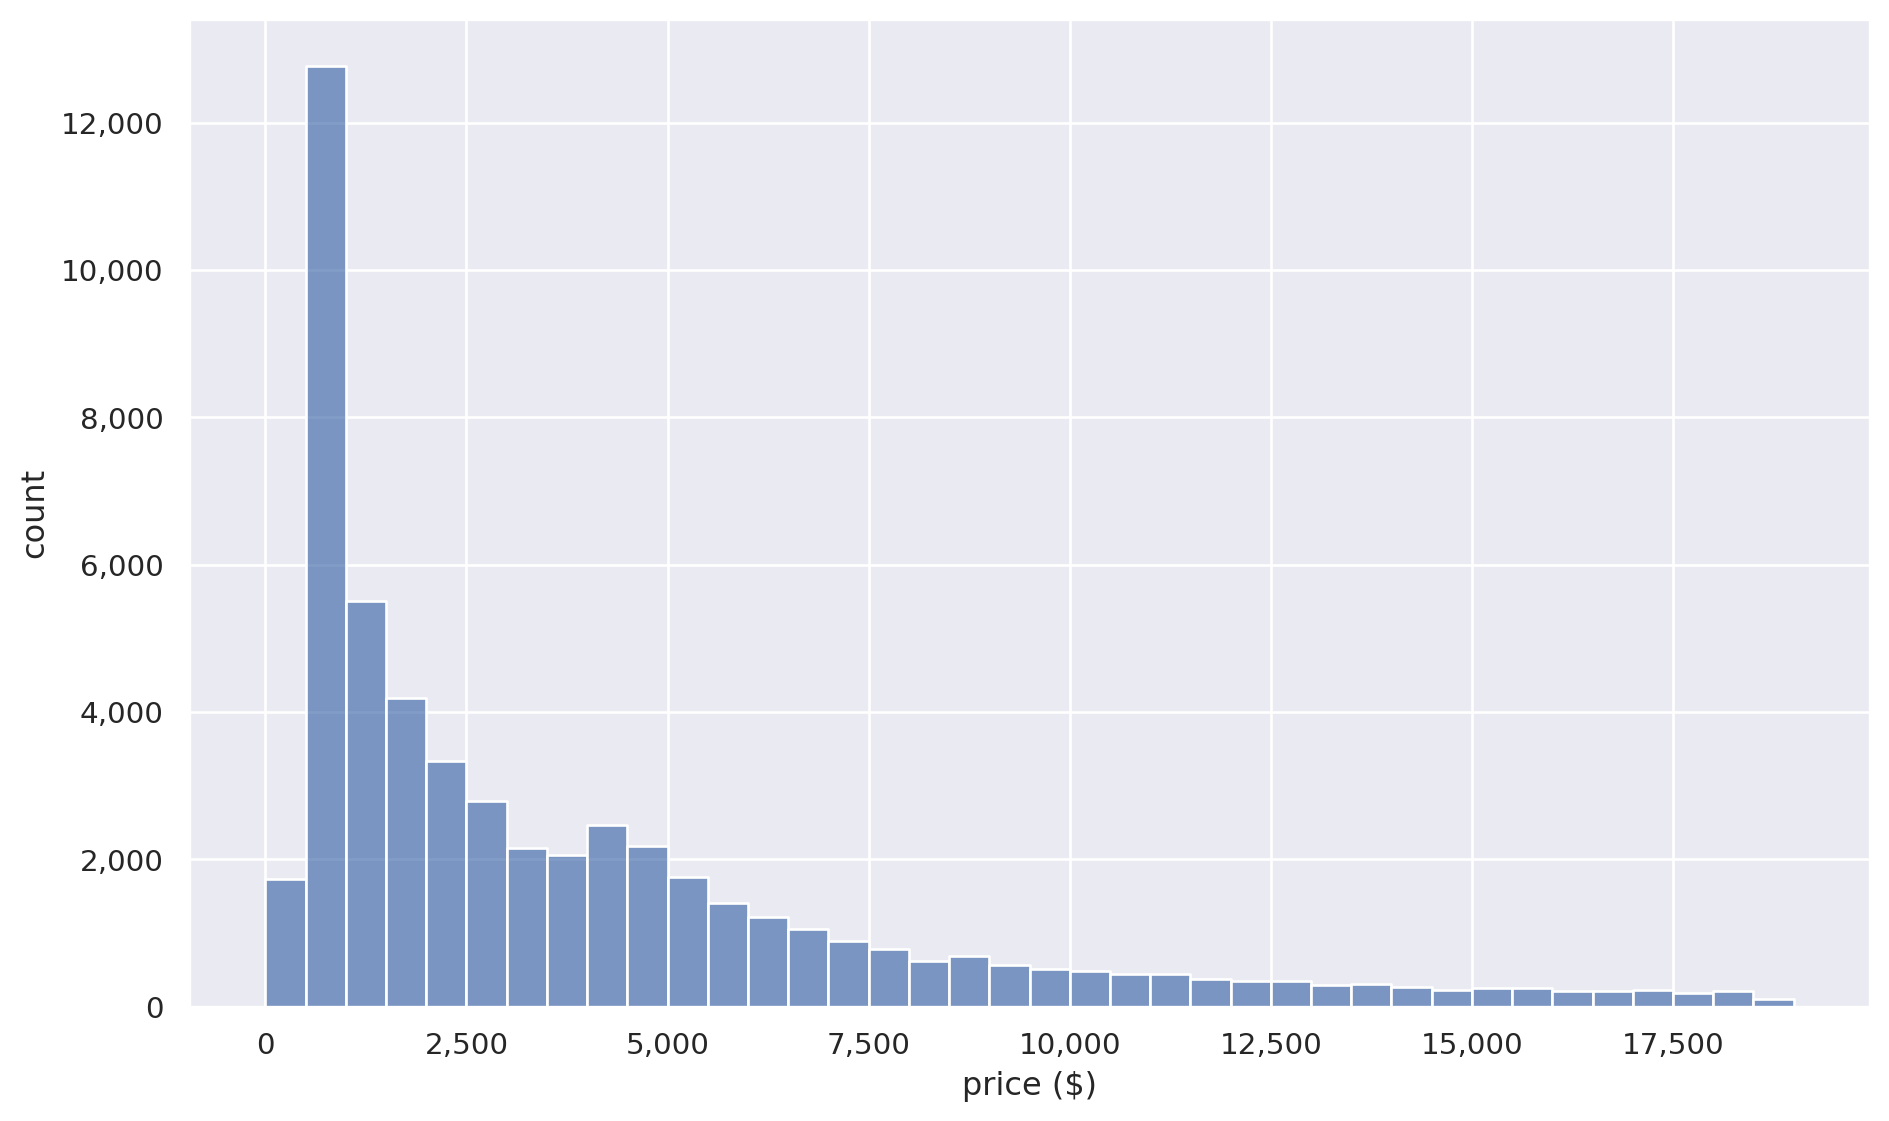

In [5]:
(so.Plot(diamonds, "price")
  .add(so.Bars(), so.Hist(binwidth=500, binrange=(0,20000)))
  .label(y="count", x="price ($)")
  .scale(x=so.Continuous().label(like="{x:,.0f}"), y=so.Continuous().label(like="{x:,.0f}"))
  .layout(size=(10,6))
)

Changing the binwidth to $1000

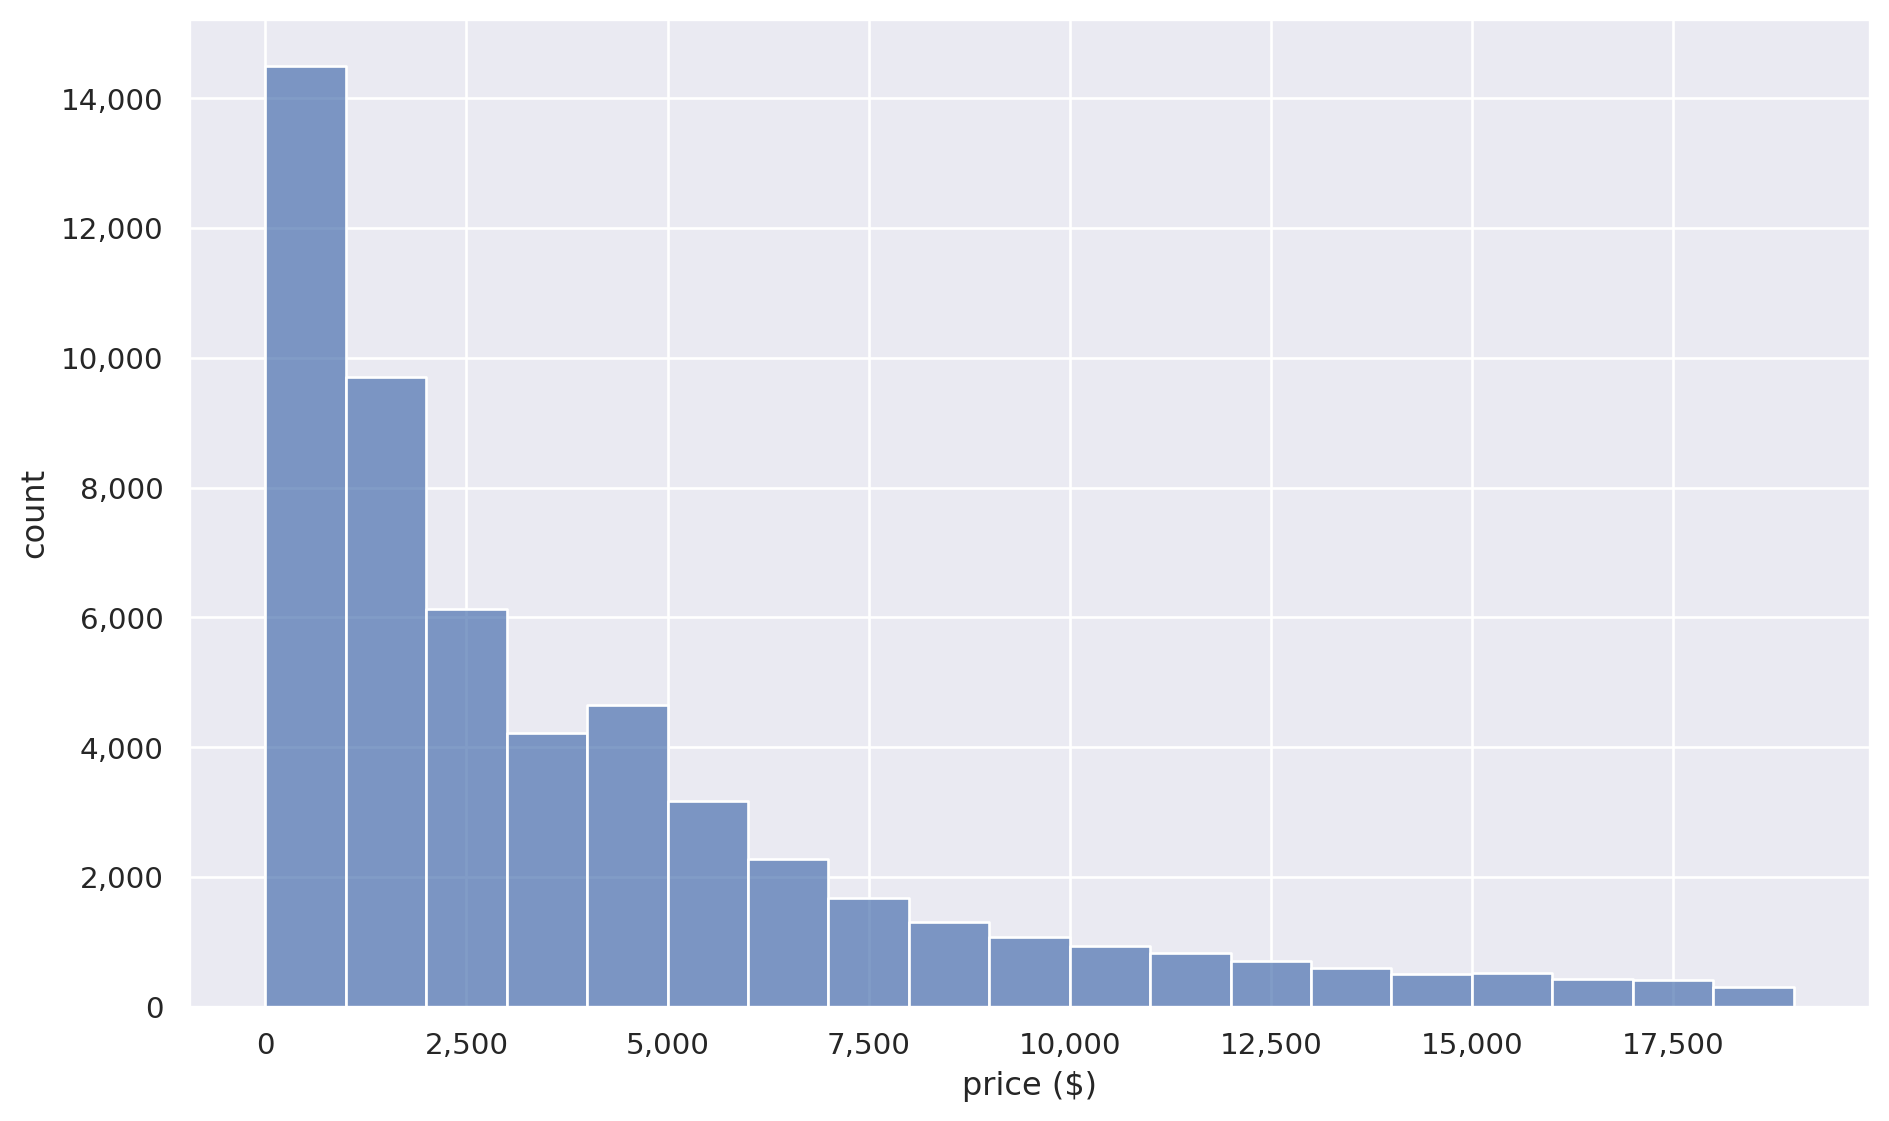

In [6]:
(so.Plot(diamonds, "price")
  .add(so.Bars(), so.Hist(binwidth=1000, binrange=(0,20000)))
  .label(y="count", x="price ($)")
  .scale(x=so.Continuous().label(like="{x:,.0f}"), y=so.Continuous().label(like="{x:,.0f}"))
  .layout(size=(10,6))
)

Changing the binwidth to $100

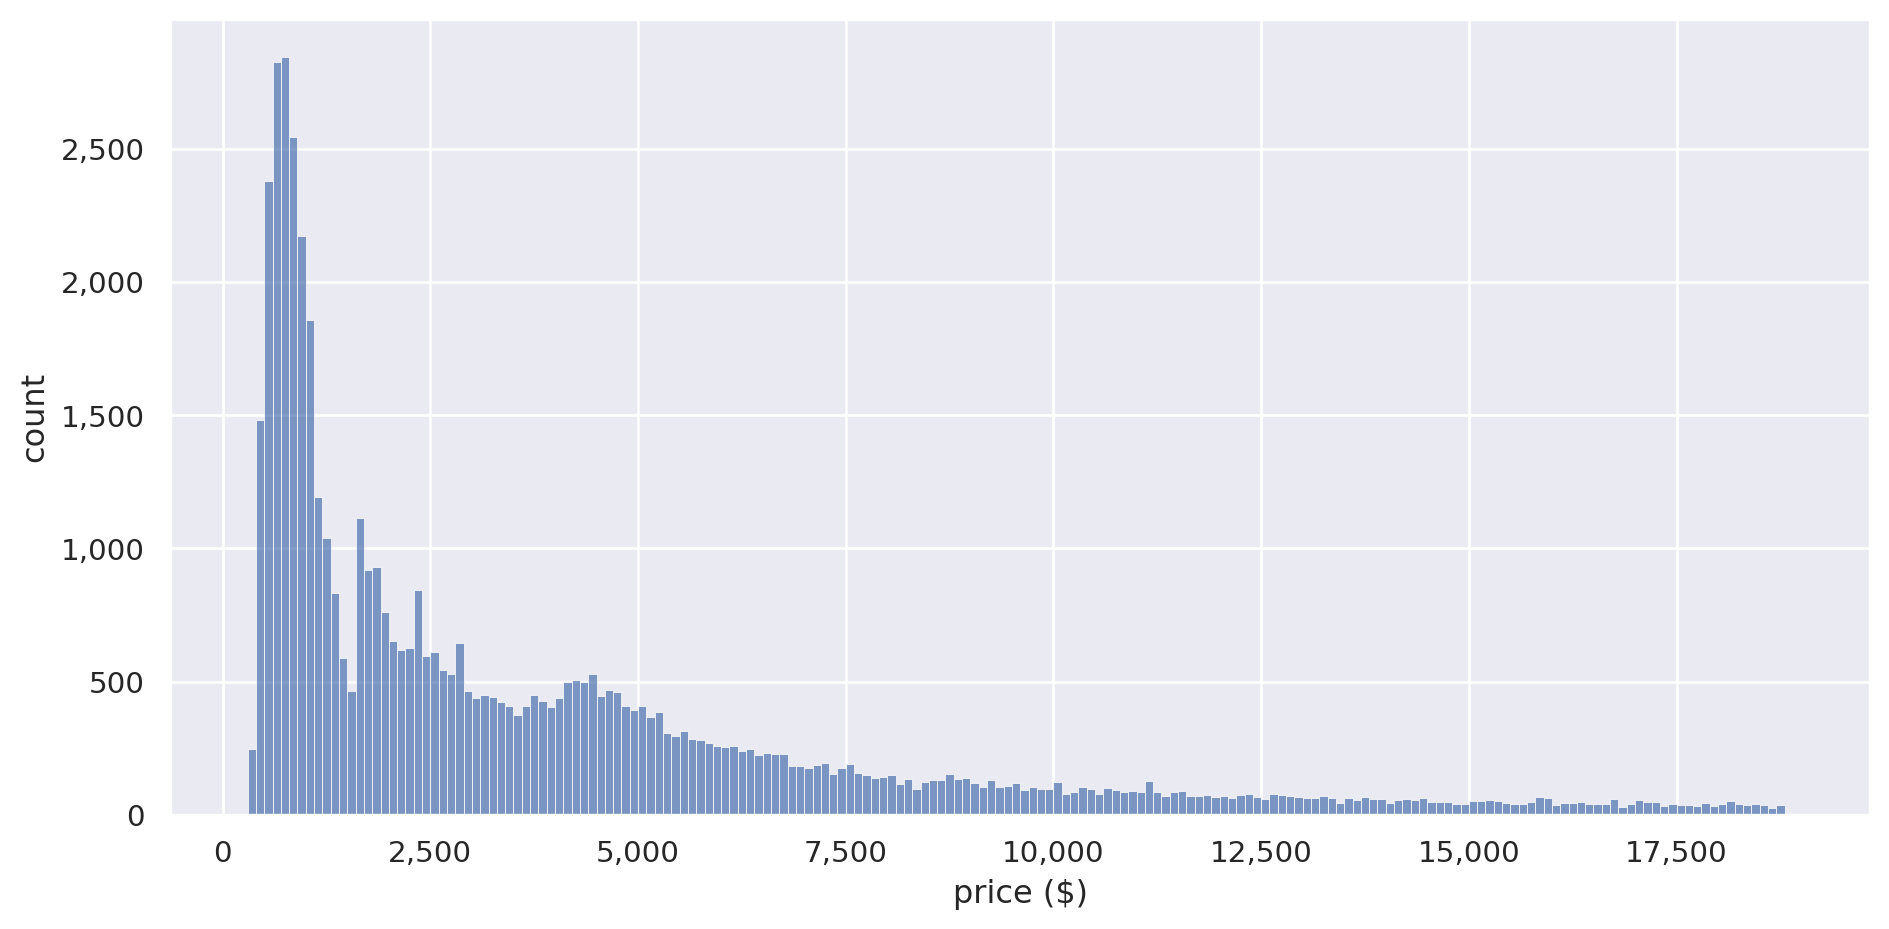

In [7]:
(so.Plot(diamonds, "price")
  .add(so.Bars(), so.Hist(binwidth=100, binrange=(0,20000)))
  .label(y="count", x="price ($)")
  .scale(x=so.Continuous().label(like="{x:,.0f}"), y=so.Continuous().label(like="{x:,.0f}"))
  .layout(size=(10,5))
)

## Boxplot
We're again looking at the price of diamonds. This time, we'll use boxplots (`sns.boxplot()`).

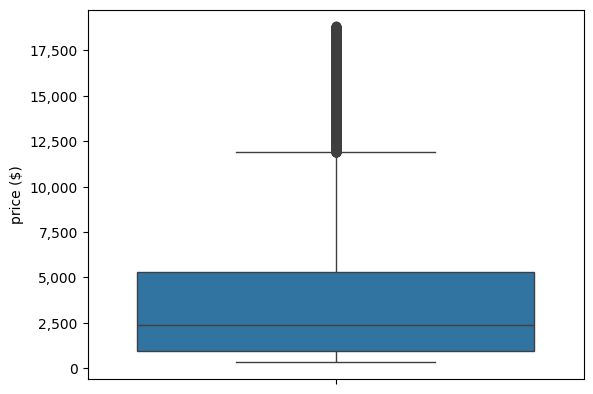

In [8]:
ax = sns.boxplot(data=diamonds, y='price')
ax.set(ylabel='price ($)')
ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

Now, let's look at these by cut and have a separate box plot for each cut type.

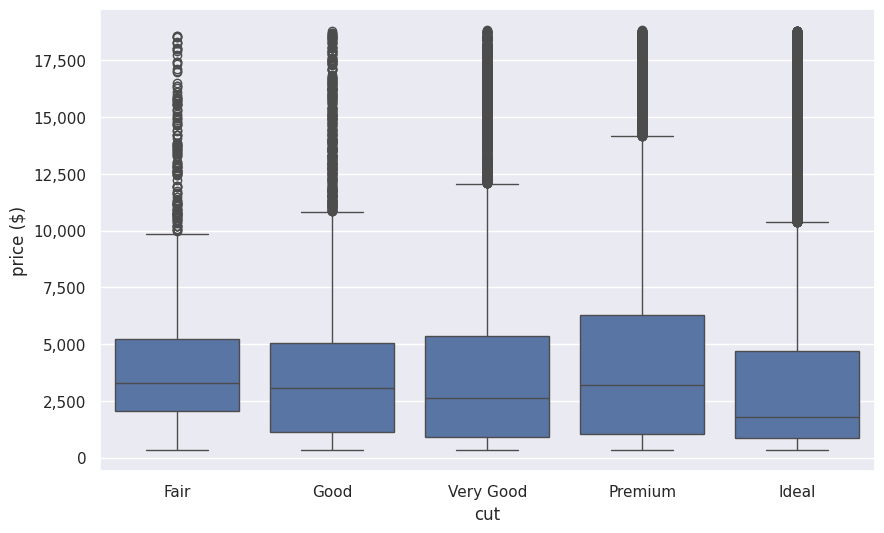

In [9]:
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.boxplot(data=diamonds, y='price', x='cut')
ax.set(ylabel='price ($)')
ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

## Empirical CDF
The empirical CDF (CDF) code is similar to the boxplot, but we use `sns.ecdfplot()` and put the attribute on the x axis.

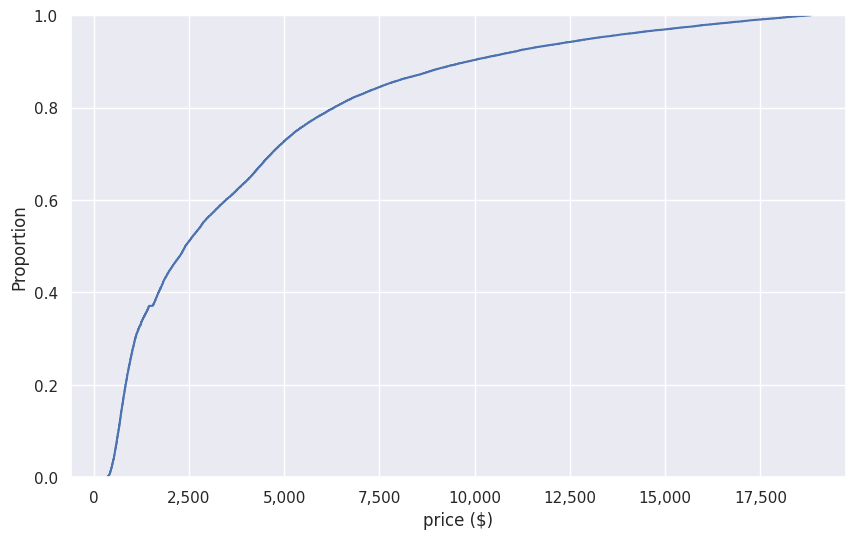

In [10]:
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.ecdfplot(data=diamonds, x='price')
ax.set(xlabel='price ($)')
ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

Like with the boxplots, we can also divide the eCDF based on different categories.  In this example, we'll use `hue` to split the eCDF lines based on the `cut` attribute.

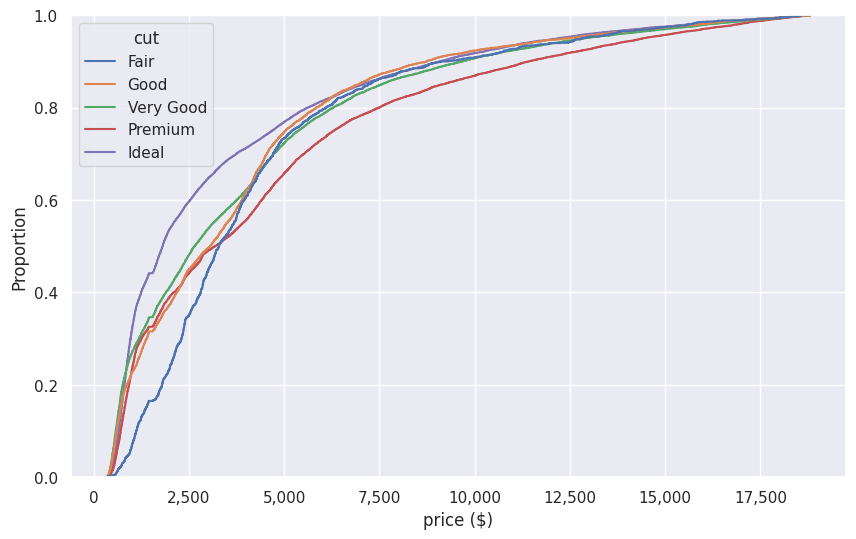

In [11]:
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.ecdfplot(data=diamonds, x='price', hue="cut")
ax.set(xlabel='price ($)')
ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

# References

Seaborn Objects:
* Histogram - https://seaborn.pydata.org/generated/seaborn.objects.Hist.html

Seaborn (not Seaborn Objects):
* Boxplot - https://seaborn.pydata.org/generated/seaborn.boxplot.html
* eCDF - https://seaborn.pydata.org/generated/seaborn.ecdfplot.html
* Histogram - https://seaborn.pydata.org/generated/seaborn.histplot.html